## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.174757
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.144339
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.282381
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.586533
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.839209
...,...,...,...,...,...,...
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.429188
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,37.924171
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,37.678047


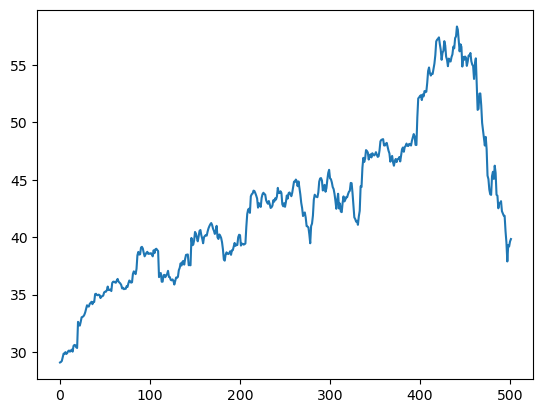

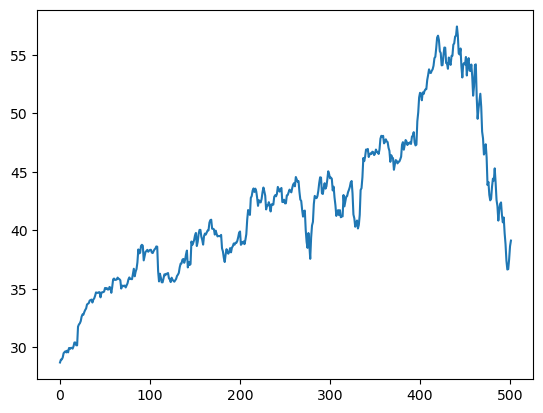

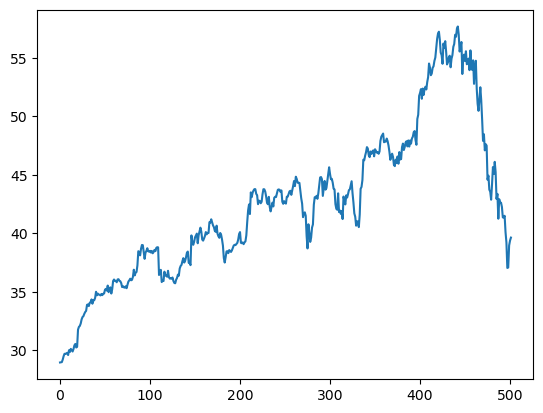

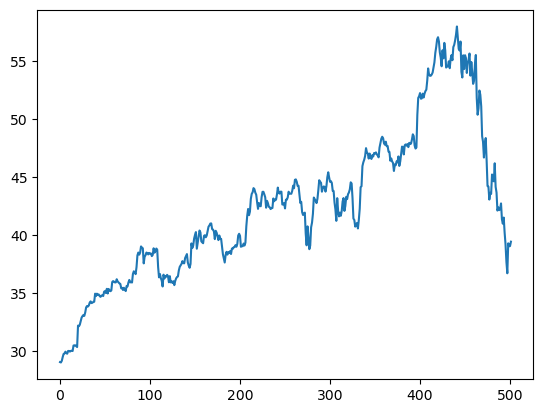

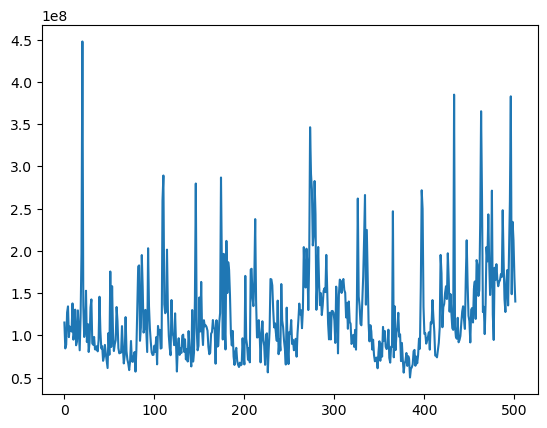

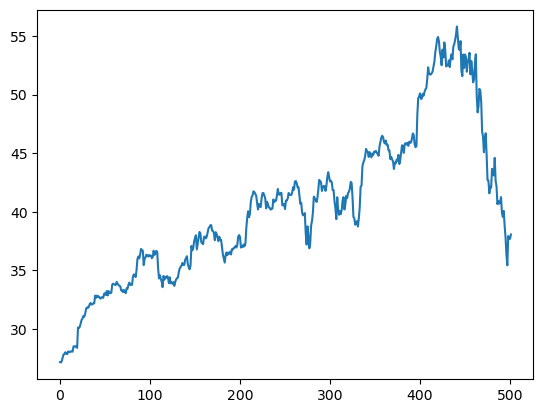

In [ ]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime
aapl = pdr.get_data_yahoo('AAPL',
                          start=datetime.datetime(2017, 1, 1),
                          end=datetime.datetime(2018, 12, 31))
display(aapl)
for i in aapl.columns:
    plt.plot(aapl[i].values)
    plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов.

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день.

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

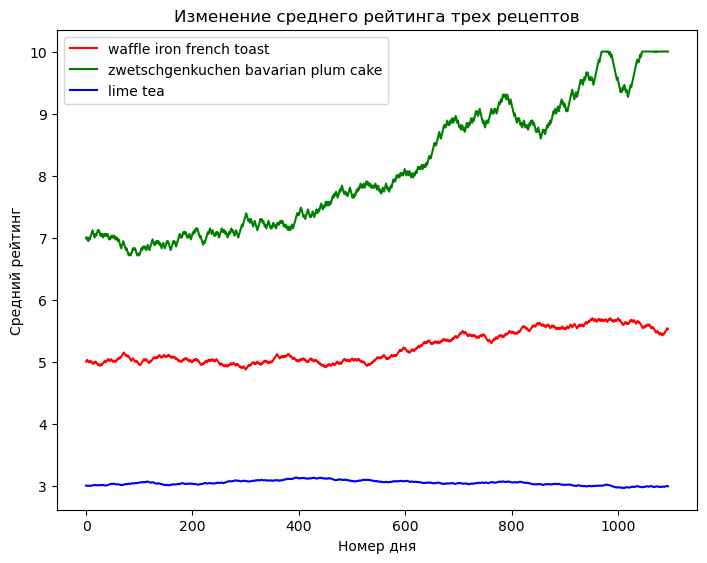

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
arr = np.load('average_ratings.npy')
days = [i for i in range(len(arr[0]))]
fig = plt.figure() #cоздание фигуры
ax = fig.add_axes([0.1, 0.1, 1, 1]) #cистема координат с отступами и размерами
line0, = ax.plot(days, arr[0], 'r', label='waffle iron french toast')
line1, = ax.plot(days, arr[1], 'g', label='zwetschgenkuchen bavarian plum cake')
line2, = ax.plot(days, arr[2], 'b', label='lime tea')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.legend(handles=[line0, line1, line2], loc='upper left')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: UserWarning: Parsing '30/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


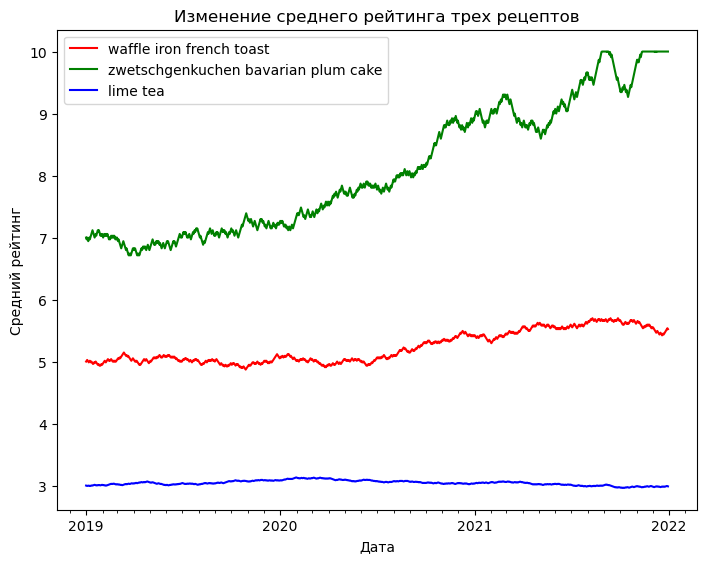

In [ ]:
days = pd.date_range(start='1/1/2019', end='30/12/2021')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
line0, = ax.plot(days, arr[0], 'r', label='waffle iron french toast')
line1, = ax.plot(days, arr[1], 'g', label='zwetschgenkuchen bavarian plum cake')
line2, = ax.plot(days, arr[2], 'b', label='lime tea')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.legend(handles=[line0, line1, line2], loc='upper left')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13))) # получение главных тикеров с подписями
ax.xaxis.set_minor_locator(mdates.MonthLocator()) # разбиение на тикеры без подписей
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) #форматирование вывода главных тикеров

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

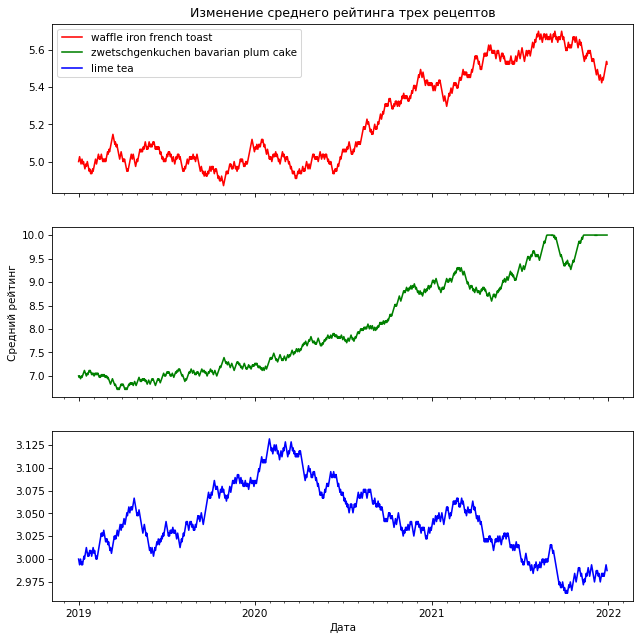

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, dpi=75, figsize=(10, 10), sharex=True) # sharex - общее для оси х
line0, = ax0.plot(days, arr[0], 'r', label='waffle iron french toast')
ax0.set_title('Изменение среднего рейтинга трех рецептов')
ax0.legend(handles=[line0, line1, line2], loc='upper left')
line1, = ax1.plot(days, arr[1], 'g', label='zwetschgenkuchen bavarian plum cake')
ax1.set_ylabel('Средний рейтинг')
line2, = ax2.plot(days, arr[2], 'b', label='lime tea')
ax2.set_xlabel('Дата')
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

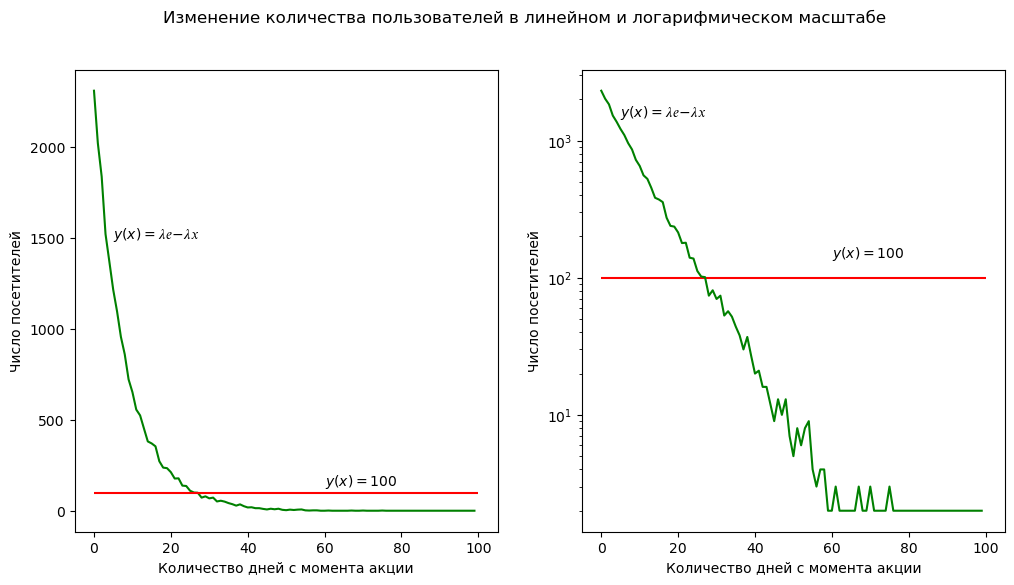

In [ ]:
visit = np.load('visitors.npy')
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
days = [i for i in range(len(visit))]
line0, = ax0.plot(days, visit, 'g')
ax0.hlines(100, 0, 100, 'r') #значение по y, начало, конец
ax1.hlines(100, 0, 100, 'r')
ax0.text(5, 1500, '$y(x)=𝜆𝑒−𝜆𝑥$')
ax1.text(5, 1500, '$y(x)=𝜆𝑒−𝜆𝑥$')
ax0.set_xlabel('Количество дней с момента акции')
ax1.set_xlabel('Количество дней с момента акции')
ax0.set_ylabel('Число посетителей')
ax1.set_ylabel('Число посетителей')
ax1.set_yscale("log") # логарифмический масштаб
line1, = ax1.plot(days, visit, 'g')
ax0.text(60, 140, '$y(x)=100$', fontsize = 10) #добавление текста
ax1.text(60, 140, '$y(x)=100$', fontsize = 10)
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
recipes = pd.read_csv('recipes_sample.csv', delimiter=',', parse_dates=['submitted'])
reviews = pd.read_csv('reviews_sample.csv', delimiter=',', parse_dates=['date'], index_col = 0)
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,продолжительность
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,средний
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,средний
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,средний
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,средний
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,длинный
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,длинный
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,длинный
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,длинный


,steps,names
0,4.990431,короткие
1,8.581922,средние
2,11.917290,длинные


,counts
короткие,675
средние,17607
длинные,11718


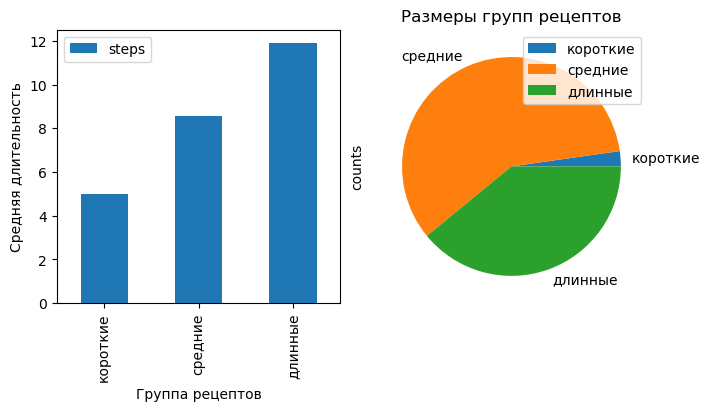

In [ ]:
recipes.loc[recipes['minutes'] < 5, 'продолжительность'] = 'короткий'
recipes.loc[recipes['minutes'] >= 50, 'продолжительность'] = 'длинный'
recipes['продолжительность'].fillna('средний', inplace=True)
display(recipes)
df = pd.DataFrame()
df['steps'] = [recipes.loc[recipes['продолжительность'] =='короткий', 'n_steps'].mean(), recipes.loc[recipes['продолжительность'] =='средний', 'n_steps'].mean(), recipes.loc[recipes['продолжительность'] =='длинный', 'n_steps'].mean()]
df['names'] = ['короткие', 'средние', 'длинные']
display(df)
df2 = pd.DataFrame(index=['короткие', 'средние', 'длинные'])
df2['counts']=[recipes[recipes['продолжительность'] =='короткий'].id.count(), recipes[recipes['продолжительность']=='средний'].id.count(), recipes[recipes['продолжительность']=='длинный'].id.count()]
fig, axes = plt.subplots(nrows=1, ncols=2, layout="constrained", figsize=(7,4))
display(df2)
df.plot(ax=axes[0], kind='bar', x = 'names', y = 'steps', xlabel='Группа рецептов', ylabel='Средняя длительность')
df2.plot(ax=axes[1], kind='pie', subplots=True, title=['Размеры групп рецептов']);

In [ ]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,продолжительность
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,средний
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,средний
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,средний
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,средний
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,длинный
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,длинный
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,длинный
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,длинный


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

,user_id,recipe_id,date,rating,review
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
1023302,308434,11252,2008-12-14,5,Oh Bergy! These wonderful little cakes are aw...
264646,151754,285773,2008-09-04,0,"This was a very moist cornbread, even two days..."
126930,379985,150499,2008-08-21,5,I really liked this recipe. It's perfect to ma...
...,...,...,...,...,...
1000833,125772,246370,2008-12-03,5,Very good I put mine in the crock pot. We love...
1332,424680,99672,2008-02-21,5,Here's a nice way to put everything in the sam...
532061,335737,36548,2008-04-22,5,If only there were more stars to give! Normall...
344676,724631,314698,2008-10-14,5,"5 Stars, The Hunter said the mushrooms and sau..."


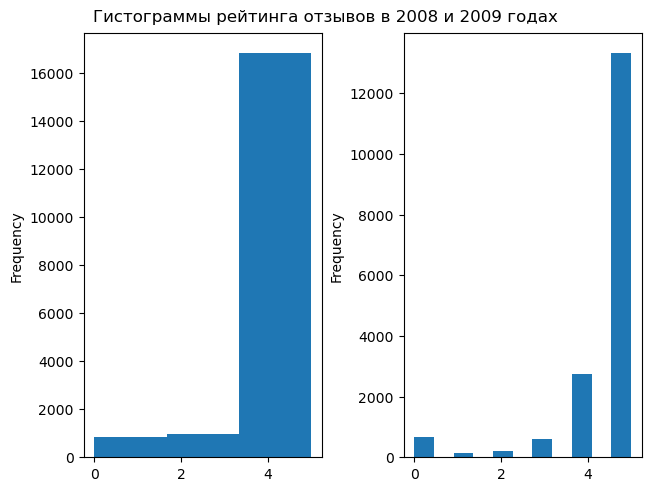

In [ ]:
y_2008 = reviews[reviews['date'].dt.year == 2008]
y_2009 = reviews[reviews['date'].dt.year == 2009]
display(y_2008)
fig, axes = plt.subplots(nrows=1, ncols=2, layout="constrained", )
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
y_2008.rating.plot.hist(ax=axes[0], bins=3)
y_2009.rating.plot.hist(ax=axes[1], bins=11);

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5).

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

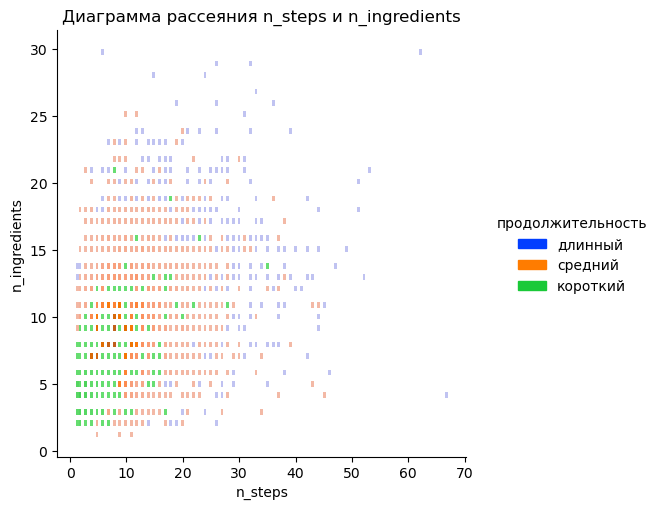

In [ ]:
sns.displot(recipes, x='n_steps', y='n_ingredients', hue='продолжительность',palette='bright').set(title='Диаграмма рассеяния n_steps и n_ingredients');

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap).

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`.

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

,id,minutes,n_steps,n_ingredients,recipe_id,rating
0,44123,90,NaN,18.0,44123,5
1,44123,90,NaN,18.0,44123,5
2,44123,90,NaN,18.0,44123,5
3,67664,10,NaN,NaN,67664,5
4,67664,10,NaN,NaN,67664,5
...,...,...,...,...,...,...
126691,486161,60,NaN,NaN,486161,5
126692,486161,60,NaN,NaN,486161,5
126693,486161,60,NaN,NaN,486161,5
126694,486161,60,NaN,NaN,486161,5


,minutes,n_steps,n_ingredients,rating
0,90,NaN,18.0,5
1,90,NaN,18.0,5
2,90,NaN,18.0,5
3,10,NaN,NaN,5
4,10,NaN,NaN,5
...,...,...,...,...
126691,60,NaN,NaN,5
126692,60,NaN,NaN,5
126693,60,NaN,NaN,5
126694,60,NaN,NaN,5


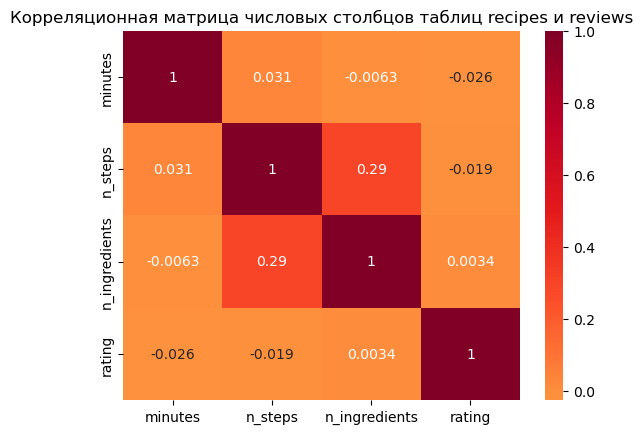

In [ ]:
corrCoef = recipes[['id', 'minutes', 'n_steps', 'n_ingredients']].merge(reviews[['recipe_id', 'rating']], left_on = 'id', right_on ='recipe_id')
display(corrCoef)
corrCoef.drop(['recipe_id', 'id'], axis=1, inplace=True)
display(corrCoef)
sns.heatmap(corrCoef.corr(), cmap='YlOrRd', center=0.0, annot = True).set(title='Корреляционная матрица числовых столбцов таблиц recipes и reviews');